In [1]:
%load_ext autoreload
%autoreload 2

import pickle
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append("../")
from read_tfrecords import OccnetTfrecordLoader
from models.research.keypointnet.main import Transformer, meshgrid
# from models.research.keypointnet.main import 

In [2]:
import cv2
import math

In [3]:
sess = tf.Session()

In [4]:
vw, vh = 128, 128

In [5]:
occnet_dataloader = OccnetTfrecordLoader("../datasets/00005/", occnet_data=True)
occnet_transformer = Transformer(128, 128, "../datasets/00005/", occnet=True)
occnet_features = occnet_dataloader.get_features()
# features = sess.run(features)

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


In [6]:
occnet_features.keys()

dict_keys(['img0', 'img0_depth', 'img0_mask', 'img1', 'img1_depth', 'img1_mask', 'mv0', 'mv1', 'mvi0', 'mvi1', 'img0_png', 'img1_png', 'lr0', 'lr1'])

In [33]:
images = occnet_features["img0"]


In [8]:
alpha = sess.run(images)

In [9]:
a = alpha[0, :, :, :3]

In [34]:
images = occnet_features["img0"]

# mask = alpha[0, :, :, 3]
mask =images[:,:,:,3]
mask = tf.cast(tf.greater(mask, tf.zeros_like(mask)), dtype=tf.float32)


alpha, result = sess.run([images, mask])

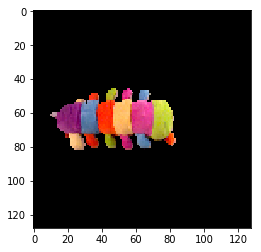

In [35]:
plt.imshow(alpha[0,:,:,:3])

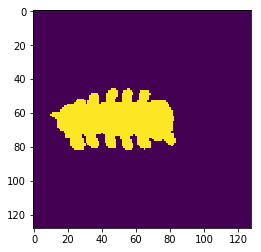

In [36]:
plt.imshow(result[0])

In [31]:
result.shape

(1, 128, 128)

In [28]:
b = a[:,:,:1].copy()

In [30]:
b.shape

(128, 128, 1)

In [26]:
a.shape

(128, 128, 3)

In [32]:
np.concatenate((a, b), axis=2).shape

(128, 128, 4)

In [19]:
for i in alpha

1.0

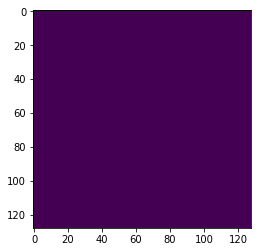

In [17]:
plt.imshow(alpha)

In [7]:
sess.run([occnet_features["lr0"], occnet_features["mv0"]])

[array([[0.84946895]], dtype=float32),
 array([[ 0.84946895, -0.527144  , -0.0228397 , -0.60645175, -0.22305553,
         -0.31954196, -0.9209447 ,  0.20278333,  0.47817227,  0.7874085 ,
         -0.38902336,  0.3866775 ,  0.        ,  0.        ,  0.        ,
          1.        ]], dtype=float32)]

In [ ]:
mask = rgba[:, :, :, 3]
mask = tf.cast(tf.greater(mask, tf.zeros_like(mask)), dtype=tf.float32)

In [1]:
images = occnet_features["img0"][:1,:,:,:3]

# [batch, 1]
lr_estimated = tf.constant([0.0])

lr = lr_estimated
lr = tf.expand_dims(lr, 0)
# # if lr_gt is None:
# #   lr = lr_estimated
# # else:
# #   lr_gt = tf.maximum(0.0, tf.sign(lr_gt[:, :1]))
# #   lr = tf.round(lr_gt * anneal + lr_estimated * (1 - anneal))

lrtiled = tf.tile(
  tf.expand_dims(tf.expand_dims(lr, 1), 1),
  [1, images.shape[1], images.shape[2], 1])

images = tf.concat([images, lrtiled], axis=3)

NameError: name 'occnet_features' is not defined

In [9]:
import tensorflow.contrib.slim as slim

In [10]:
with slim.arg_scope(
      [slim.conv2d, slim.fully_connected],
      normalizer_fn=slim.batch_norm,
      activation_fn=lambda x: tf.nn.leaky_relu(x, alpha=0.1),
      normalizer_params={"is_training": True}):
    for i, r in enumerate([1, 1, 2, 4, 8, 16, 1, 2, 4, 8, 16, 1]):
      net = slim.conv2d(images, 64, [3, 3], rate=r, scope="dconv%d" % i)

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
prob = slim.conv2d(
      net, 10, [3, 3], rate=1, scope="conv_xy", activation_fn=None)

In [12]:
sess.run(tf.global_variables_initializer())
sess.run(tf.local_variables_initializer())
print(sess.run(net).shape)
print(sess.run(prob).shape)

(1, 128, 128, 64)
(1, 128, 128, 10)


In [13]:
prob = tf.transpose(prob, [0, 3, 1, 2])

In [38]:
ranx, rany = meshgrid(128)

In [47]:
ranx.shape

TensorShape([Dimension(128), Dimension(128)])

In [46]:
sx = tf.reduce_sum(prob * ranx, axis=[2, 3])

In [45]:
sess.run(prob).shape

(1, 10, 128, 128)

In [42]:
sess.run(sx)

array([[ -417.97763, -1072.014  , -2482.569  , -3290.79   ,  1760.5096 ,
         -885.30774,   961.31836,   181.70825, -1243.397  ,   586.7436 ]],
      dtype=float32)

In [14]:
print(sess.run(prob).shape)

(1, 10, 128, 128)


In [53]:
sess.run(meshgrid(128)[0][3])

array([-0.9921875, -0.9765625, -0.9609375, -0.9453125, -0.9296875,
       -0.9140625, -0.8984375, -0.8828125, -0.8671875, -0.8515625,
       -0.8359375, -0.8203125, -0.8046875, -0.7890625, -0.7734375,
       -0.7578125, -0.7421875, -0.7265625, -0.7109375, -0.6953125,
       -0.6796875, -0.6640625, -0.6484375, -0.6328125, -0.6171875,
       -0.6015625, -0.5859375, -0.5703125, -0.5546875, -0.5390625,
       -0.5234375, -0.5078125, -0.4921875, -0.4765625, -0.4609375,
       -0.4453125, -0.4296875, -0.4140625, -0.3984375, -0.3828125,
       -0.3671875, -0.3515625, -0.3359375, -0.3203125, -0.3046875,
       -0.2890625, -0.2734375, -0.2578125, -0.2421875, -0.2265625,
       -0.2109375, -0.1953125, -0.1796875, -0.1640625, -0.1484375,
       -0.1328125, -0.1171875, -0.1015625, -0.0859375, -0.0703125,
       -0.0546875, -0.0390625, -0.0234375, -0.0078125,  0.0078125,
        0.0234375,  0.0390625,  0.0546875,  0.0703125,  0.0859375,
        0.1015625,  0.1171875,  0.1328125,  0.1484375,  0.1640

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


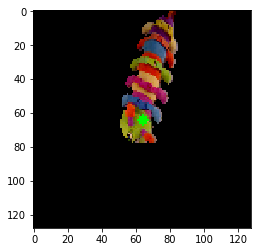

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


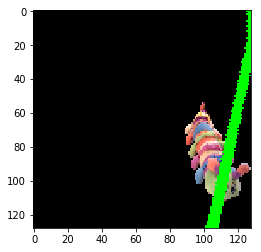

In [28]:
def func1(x):
    return tf.transpose(tf.reshape(occnet_features[x], [-1, 4, 4]), [0, 2, 1])

mv = [func1("mv%d" % i) for i in range(2)]
mvi = [func1("mvi%d" % i) for i in range(2)]
img0_depth = tf.reshape(occnet_features["img0_depth"], [-1, 480, 640])

u, v = 0.0, 0.0
points = []
for z in np.linspace(-0.5, 0.5, num=100):
    z_value = (img0_depth[0, 240, 320] / 1000.0) + z
    points.append([u, v, z_value])

# add back batch dimension
uvz = tf.expand_dims(tf.convert_to_tensor(points), axis=0)

world_coords = tf.matmul(occnet_transformer.unproject(uvz), mvi[0])
uvz_proj = occnet_transformer.project(tf.matmul(world_coords, mv[1 - 0]))

uvz, uvz_proj, img0, img1, img0_depth = sess.run(
    [
        uvz,
        uvz_proj,
        occnet_features["img0"][0, :, :, :3],
        occnet_features["img1"][0, :, :, :3],
        img0_depth
    ]
)

# draw on the image
x = int((u + 1.0) * 64.0)
y = int((v + 1.0) * 64.0)
new_img0 = cv2.circle(img0.copy(), (x, y), 3, (0, 255, 0), -1)
plt.imshow(new_img0)
plt.show()

new_img1 = img1.copy()
for index, point in enumerate(uvz_proj[0]):
#     print(index)
#     print(point)
    try:
        u, v, z = point
        
#         x = int((u + 1.0) * 64.0)
#         y = 128 - int((v + 1.0) * 64.0)
        
        x = (min(max(u, -1), 1) * vw / 2 + vw / 2) - 0.5
        y = vh - 0.5 - (min(max(v, -1), 1) * vh / 2 + vh / 2)
        if math.isnan(x) or math.isnan(y):
            pass

        x = int(round(x))
        y = int(round(y))

        new_img1 = cv2.circle(new_img1, (x, y), 3, (0, 255, 0), -1)
    except:
        pass

plt.imshow(new_img1)
plt.show()

# plt.imshow(img0_depth[0])
# plt.show()


In [14]:
keypointnet_dataloader = OccnetTfrecordLoader("../../data/cars_with_keypoints/", occnet_data=False)
keypointnet_transformer = Transformer(128, 128, "../../data/cars_with_keypoints/", occnet=False)
keypointnet_features = keypointnet_dataloader.get_features()
# keypointnet_features = sess.run(keypointnet_features)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


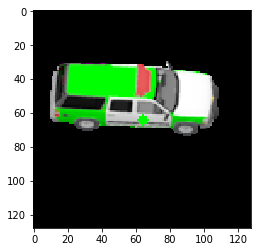

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


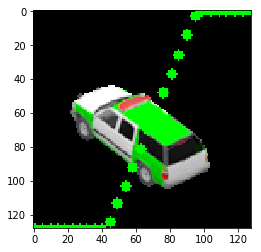

In [30]:
def func1(x):
    return tf.transpose(tf.reshape(keypointnet_features[x], [-1, 4, 4]), [0, 2, 1])

mv = [func1("mv%d" % i) for i in range(2)]
mvi = [func1("mvi%d" % i) for i in range(2)]

u, v = 0.0, 0.0
points = []
for z in np.linspace(-50.0, 0.0, num=200):
    points.append([u, v, z])
    
uvz = tf.constant([points])

world_coords = tf.matmul(keypointnet_transformer.unproject(uvz), mvi[0])
uvz_proj = keypointnet_transformer.project(tf.matmul(world_coords, mv[1 - 0]))

uvz, uvz_proj, img0, img1 = sess.run(
    [
        uvz,
        uvz_proj,
        keypointnet_features["img0"][0, :, :, :3],
        keypointnet_features["img1"][0, :, :, :3]
    ]
)

# draw on the image
x = int((u + 1.0) * 64.0)
y = int((v + 1.0) * 64.0)
new_img0 = cv2.circle(img0.copy(), (x, y), 3, (0, 255, 0), -1)
plt.imshow(new_img0)
plt.show()

new_img1 = img1.copy()
for index, point in enumerate(uvz_proj[0]):
#     print(index)
#     print(point)

    u, v, z = point
    # ---
#     x = int((u + 1.0) * 64.0)
#     y = 128 - int((v + 1.0) * 64.0)
    # OR
    x = (min(max(u, -1), 1) * vw / 2 + vw / 2) - 0.5
    y = vh - 0.5 - (min(max(v, -1), 1) * vh / 2 + vh / 2)
    x = int(round(x))
    y = int(round(y))
    
    new_img1 = cv2.circle(new_img1, (x, y), 3, (0, 255, 0), -1)

plt.imshow(new_img1)
plt.show()
